In [1]:
#import dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Establish CSV path for relevant files
csv_path1 = "../Player Tweets/Rey Maualuga_Trans 1.csv"
csv_path2 = "../Player Tweets/Rey Maualuga_Trans 2.csv"
csv_path3 = "../Player Tweets/Rey Maualuga_Trans 3.csv"

#Establish pd dataframe for each file
reymaualuga1 = pd.read_csv(csv_path1, sep=";")
reymaualuga2 = pd.read_csv(csv_path2, sep=";")
reymaualuga3 = pd.read_csv(csv_path3, sep=";", error_bad_lines=False)

#concatenate data frames 
reymaualuga_master = pd.concat([reymaualuga1, reymaualuga2, reymaualuga3])
reymaualuga_master

b'Skipping line 492: expected 10 fields, saw 11\n'


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2009-05-01 18:06,0,0,NFL Video >> Maualuga's first practice: Bengal...,NaN,NaN,NaN,1673874150,https://twitter.com/BR_CincyBengals/status/167...
1,NaN,2009-05-01 17:35,0,0,"At Bengals practice, I curiously didn't see Re...",NaN,NaN,NaN,1673632128,https://twitter.com/partingscott/status/167363...
2,NaN,2009-05-01 16:52,0,0,Coming up on News 5 at 6:20p Check out the 'lo...,NaN,NaN,NaN,1673279303,https://twitter.com/kenbroo/status/1673279303
3,NaN,2009-05-01 15:38,0,0,Rey Maualuga ready to show scouts what they mi...,NaN,NaN,NaN,1672662276,https://twitter.com/rowatch/status/1672662276
4,NaN,2009-05-01 15:20,0,0,http://bit.ly/Zrto7 Rey Maualuga ready to show...,NaN,NaN,NaN,1672514174,https://twitter.com/RickEriksen9/status/167251...
5,NaN,2009-05-01 14:53,0,0,Rey Rey Maualuga in the Locker Room Video - ht...,NaN,NaN,NaN,1672277168,https://twitter.com/cinbengals/status/1672277168
6,NaN,2009-05-01 14:49,0,0,Los Angeles Times >> Rey Maualuga ready to sho...,NaN,NaN,NaN,1672244191,https://twitter.com/uscbuzztap/status/1672244191
7,NaN,2009-05-01 14:42,0,0,Rey Maualuga ready to show scouts what they mi...,NaN,NaN,NaN,1672184326,https://twitter.com/seahawknews/status/1672184326
8,NaN,2009-05-01 14:35,0,0,great read on # Bengals rookie LB Rey Maualuga...,NaN,NaN,# #,1672125928,https://twitter.com/RyanCost1/status/1672125928
9,NaN,2009-05-01 14:28,0,0,Rey Maualuga ready to show scouts what they mi...,NaN,NaN,NaN,1672059369,https://twitter.com/mg_sports/status/1672059369


In [2]:
#fillna's with text to fix error
reymaualuga_master["text"].fillna("text", inplace=True)
reymaualuga_master.head()


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2009-05-01 18:06,0,0,NFL Video >> Maualuga's first practice: Bengal...,NaN,NaN,NaN,1673874150,https://twitter.com/BR_CincyBengals/status/167...
1,NaN,2009-05-01 17:35,0,0,"At Bengals practice, I curiously didn't see Re...",NaN,NaN,NaN,1673632128,https://twitter.com/partingscott/status/167363...
2,NaN,2009-05-01 16:52,0,0,Coming up on News 5 at 6:20p Check out the 'lo...,NaN,NaN,NaN,1673279303,https://twitter.com/kenbroo/status/1673279303
3,NaN,2009-05-01 15:38,0,0,Rey Maualuga ready to show scouts what they mi...,NaN,NaN,NaN,1672662276,https://twitter.com/rowatch/status/1672662276
4,NaN,2009-05-01 15:20,0,0,http://bit.ly/Zrto7 Rey Maualuga ready to show...,NaN,NaN,NaN,1672514174,https://twitter.com/RickEriksen9/status/167251...


In [3]:
#create list of sentiment scores associated with tweets about relevant player

reymaualuga_sent = []

tweets = reymaualuga_master["text"]

for index,tweet in reymaualuga_master.iterrows():
    results = analyzer.polarity_scores(tweet["text"])
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
        
    # Add sentiments for each tweet into an array
    reymaualuga_sent.append({"date": tweet["date"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg})
reymaualuga_sent



[{'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2009-05-01 18:06'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2009-05-01 17:35'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2009-05-01 16:52'},
 {'Compound': 0.0772,
  'Negative': 0.793,
  'Neutral': 0.097,
  'Positive': 0.11,
  'date': '2009-05-01 15:38'},
 {'Compound': 0.0772,
  'Negative': 0.749,
  'Neutral': 0.118,
  'Positive': 0.134,
  'date': '2009-05-01 15:20'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2009-05-01 14:53'},
 {'Compound': 0.0772,
  'Negative': 0.719,
  'Neutral': 0.132,
  'Positive': 0.15,
  'date': '2009-05-01 14:49'},
 {'Compound': 0.0772,
  'Negative': 0.701,
  'Neutral': 0.14,
  'Positive': 0.159,
  'date': '2009-05-01 14:42'},
 {'Compound': 0.6249,
  'Negative': 0.687,
  'Neutral': 0.0,
  'Positive': 0.313,
  'date': '2009-05-01 14:35'},
 {'Com

In [4]:
# Convert player sentiments to DataFrame
RM_pd = pd.DataFrame.from_dict(reymaualuga_sent)
RM_pd.head()

,Compound,Negative,Neutral,Positive,date
0,0.0000,1.000,0.000,0.000,2009-05-01 18:06
1,0.0000,1.000,0.000,0.000,2009-05-01 17:35
2,0.0000,1.000,0.000,0.000,2009-05-01 16:52
3,0.0772,0.793,0.097,0.110,2009-05-01 15:38
4,0.0772,0.749,0.118,0.134,2009-05-01 15:20


In [6]:
# merge sentiment data frame and master player tweet file

merged = pd.merge(reymaualuga_master, RM_pd, on="date", how="outer")
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive
0,NaN,2009-05-01 18:06,0,0,NFL Video >> Maualuga's first practice: Bengal...,NaN,NaN,NaN,1673874150,https://twitter.com/BR_CincyBengals/status/167...,0.0000,1.000,0.000,0.000
1,NaN,2009-05-01 17:35,0,0,"At Bengals practice, I curiously didn't see Re...",NaN,NaN,NaN,1673632128,https://twitter.com/partingscott/status/167363...,0.0000,1.000,0.000,0.000
2,NaN,2009-05-01 16:52,0,0,Coming up on News 5 at 6:20p Check out the 'lo...,NaN,NaN,NaN,1673279303,https://twitter.com/kenbroo/status/1673279303,0.0000,1.000,0.000,0.000
3,NaN,2009-05-01 15:38,0,0,Rey Maualuga ready to show scouts what they mi...,NaN,NaN,NaN,1672662276,https://twitter.com/rowatch/status/1672662276,0.0772,0.793,0.097,0.110
4,NaN,2009-05-01 15:20,0,0,http://bit.ly/Zrto7 Rey Maualuga ready to show...,NaN,NaN,NaN,1672514174,https://twitter.com/RickEriksen9/status/167251...,0.0772,0.749,0.118,0.134


In [7]:
# remove time from datetime to be able to groupby an individual day
pd.DatetimeIndex(merged.date).normalize()
merged['date_new'] = pd.DatetimeIndex(merged.date).normalize()
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new
0,NaN,2009-05-01 18:06,0,0,NFL Video >> Maualuga's first practice: Bengal...,NaN,NaN,NaN,1673874150,https://twitter.com/BR_CincyBengals/status/167...,0.0000,1.000,0.000,0.000,2009-05-01
1,NaN,2009-05-01 17:35,0,0,"At Bengals practice, I curiously didn't see Re...",NaN,NaN,NaN,1673632128,https://twitter.com/partingscott/status/167363...,0.0000,1.000,0.000,0.000,2009-05-01
2,NaN,2009-05-01 16:52,0,0,Coming up on News 5 at 6:20p Check out the 'lo...,NaN,NaN,NaN,1673279303,https://twitter.com/kenbroo/status/1673279303,0.0000,1.000,0.000,0.000,2009-05-01
3,NaN,2009-05-01 15:38,0,0,Rey Maualuga ready to show scouts what they mi...,NaN,NaN,NaN,1672662276,https://twitter.com/rowatch/status/1672662276,0.0772,0.793,0.097,0.110,2009-05-01
4,NaN,2009-05-01 15:20,0,0,http://bit.ly/Zrto7 Rey Maualuga ready to show...,NaN,NaN,NaN,1672514174,https://twitter.com/RickEriksen9/status/167251...,0.0772,0.749,0.118,0.134,2009-05-01


In [8]:
merged["date_string"] = merged["date_new"].dt.strftime('%Y-%m-%d')
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new,date_string
0,NaN,2009-05-01 18:06,0,0,NFL Video >> Maualuga's first practice: Bengal...,NaN,NaN,NaN,1673874150,https://twitter.com/BR_CincyBengals/status/167...,0.0000,1.000,0.000,0.000,2009-05-01,2009-05-01
1,NaN,2009-05-01 17:35,0,0,"At Bengals practice, I curiously didn't see Re...",NaN,NaN,NaN,1673632128,https://twitter.com/partingscott/status/167363...,0.0000,1.000,0.000,0.000,2009-05-01,2009-05-01
2,NaN,2009-05-01 16:52,0,0,Coming up on News 5 at 6:20p Check out the 'lo...,NaN,NaN,NaN,1673279303,https://twitter.com/kenbroo/status/1673279303,0.0000,1.000,0.000,0.000,2009-05-01,2009-05-01
3,NaN,2009-05-01 15:38,0,0,Rey Maualuga ready to show scouts what they mi...,NaN,NaN,NaN,1672662276,https://twitter.com/rowatch/status/1672662276,0.0772,0.793,0.097,0.110,2009-05-01,2009-05-01
4,NaN,2009-05-01 15:20,0,0,http://bit.ly/Zrto7 Rey Maualuga ready to show...,NaN,NaN,NaN,1672514174,https://twitter.com/RickEriksen9/status/167251...,0.0772,0.749,0.118,0.134,2009-05-01,2009-05-01


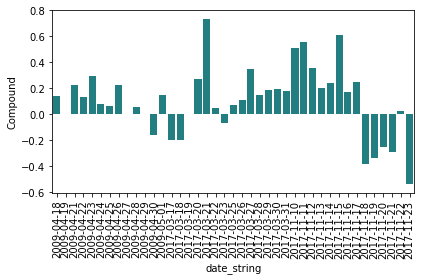

In [9]:
#plot groupby *x axis = day, y axis = compound sentiment score*
grouped = merged.groupby('date_string').mean().reset_index()
grouped.sort_values("date_string", ascending = True, inplace = True)
grouped.head()
sns.barplot(x = grouped["date_string"], y = grouped["Compound"], color = "#138D91")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('reymaualuga.png')
plt.show()
